In [1]:
#updated file
import pandas as pd

In [2]:
#! pip install git+https://git@github.com/weecology/retriever.git
#! retriever install csv mapped-plant-quads-co

# Part 1

In [3]:
plant_list = pd.read_csv('mapped_plant_quads_co_species_list.csv')
plant_list.head()

,species,density,cover,growthform,longevity
0,Achillea millefolium,2.0,NaN,forb,P
1,Agropyron smithii,4649.0,NaN,grass,P
2,Allium spp.,18.0,NaN,forb,P
3,Allium textile,73.0,NaN,forb,P
4,Ambrosia psilostachya,2.0,NaN,forb,P


In [4]:
plant_quad = pd.read_csv("mapped_plant_quads_co_quad_info.csv")
plant_quad.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_19,19,40.823798,-104.710306,1633,grazed,grazed
2,gzgz_24,24,40.822824,-104.729504,1650,grazed,grazed
3,gzgz_5a,5a,40.868138,-104.690792,1657,grazed,grazed
4,gzgz_5b,5b,40.867662,-104.680630,1661,grazed,grazed


In [5]:
all_records = pd.read_csv("mapped_plant_quads_co_allrecords_cover.csv")
all_records.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [6]:
species_year = all_records.groupby(['species','year'], as_index = False).area.sum()
species_year.head()

,species,year,area
0,Ant hill,1998,0.011008
1,Ant hill,1999,0.014806
2,Ant hill,2000,0.006458
3,Ant hill,2001,0.013366
4,Ant hill,2002,0.003034


In [7]:
species_year_wide = species_year.pivot(index = 'year', columns = 'species', values = 'area')

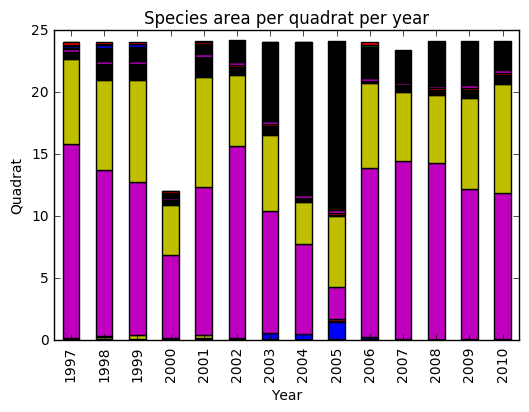

In [8]:
%matplotlib inline
species_year_plot = species_year_wide.plot(kind ='bar', stacked = True, legend = False, 
                  title = "Species area per quadrat per year")
species_year_plot.set_xlabel("Year")
species_year_plot.set_ylabel("Quadrat")

#### Figure 1
#### A plot of the area covered by each species over all quadrats (y) for each year (x).

# Part 2

In [9]:
#merge all_records and plant_list so we have table that includes all quad, years, and growthforms
merged_gf_year = pd.merge(left = all_records, right = plant_list, left_on = 'species',
                       right_on = 'species',how = 'left')
merged_gf_year.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant


In [10]:
#add total area covered for each growthform
gf_year = merged_gf_year.groupby(['growthform','year'], as_index = False).area.sum()
gf_year.head()

,growthform,year,area
0,Crown,1998,0.883835
1,Crown,1999,1.001064
2,Crown,2000,0.287084
3,Crown,2001,0.503875
4,Crown,2002,1.647143


In [11]:
gf_year_wide = gf_year.pivot(index = 'year', columns = 'growthform', values = 'area')
gf_year_wide.head()

growthform,Crown,Not plant,Unknown,grass,shrub
year,,,,,
1997,NaN,15.924538,0.004016,7.979310,0.133389
1998,0.883835,13.721476,NaN,9.214863,0.233096
1999,1.001064,12.682916,NaN,10.059053,0.302240
2000,0.287084,6.790056,0.000349,4.772160,0.167591
2001,0.503875,12.287331,0.017111,11.035961,0.235150


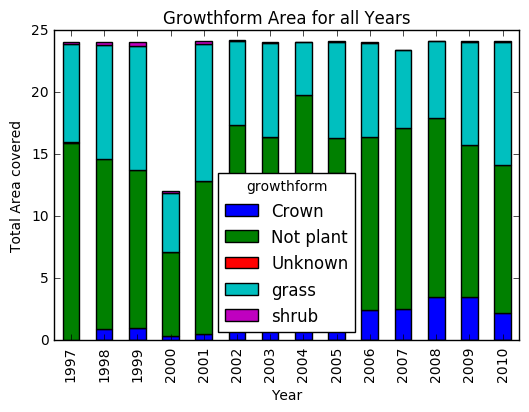

In [12]:
gf_year_plot = gf_year_wide.plot(kind ='bar', stacked = True, 
                  title = "Growthform Area for all Years")
gf_year_plot.set_xlabel("Year")
gf_year_plot.set_ylabel("Total Area covered")

This figure shows grass has the most area covered for all yeas, then Crown, and shrub covered lowest area

#### Figure 2
#### A plot of the area covered by each growth-form over all quadrats (y) for each year (x).

# Part 3

In [13]:
# plant_list = (plant_species)
# all_records = (plant_cover)
# merged_gf_year = (merged_spp_cover)

%matplotlib inline

In [14]:
climate = pd.read_csv("mapped_plant_quads_co_daily_climate.csv")
climate.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,1997,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,1997,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,1997,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,1997,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


In [15]:
#need to calculate mean precipitation per year
mean_p = climate.groupby('year',as_index=False).precip.mean()
mean_p.head()

,year,precip
0,1997,1.543701
1,1998,0.964534
2,1999,1.649775
3,2000,0.694447
4,2001,0.882880


In [16]:
merged_gf_year.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant


In [17]:
gf_yr_area = merged_gf_year.groupby(['growthform','year'], as_index = False).area.sum()
gf_yr_area.head()

,growthform,year,area
0,Crown,1998,0.883835
1,Crown,1999,1.001064
2,Crown,2000,0.287084
3,Crown,2001,0.503875
4,Crown,2002,1.647143


In [18]:
merged_gfyear_precip = pd.merge(left = gf_yr_area, right = mean_p, left_on = 'year',
                       right_on = 'year',how = 'left')
merged_gfyear_precip.head()

,growthform,year,area,precip
0,Crown,1998,0.883835,0.964534
1,Crown,1999,1.001064,1.649775
2,Crown,2000,0.287084,0.694447
3,Crown,2001,0.503875,0.882880
4,Crown,2002,1.647143,0.559414


In [19]:
#pivot table
growth_cover_precip = merged_gfyear_precip.pivot(index = 'precip', columns = 'growthform', values = 'area')
growth_cover_precip.head()

growthform,Crown,Not plant,Unknown,grass,shrub
precip,,,,,
0.559414,1.647143,15.720092,NaN,6.708050,0.086694
0.694447,0.287084,6.790056,0.000349,4.772160,0.167591
0.843191,12.285852,7.509052,NaN,4.258776,0.010477
0.882880,0.503875,12.287331,0.017111,11.035961,0.235150
0.964534,0.883835,13.721476,NaN,9.214863,0.233096


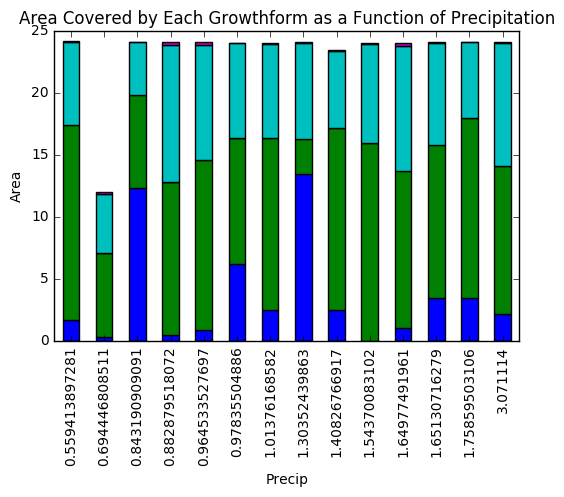

In [20]:
#creating the plot
growthform_precip_plot = growth_cover_precip.plot(kind ='bar', stacked = True, legend = False, 
                  title = "Area Covered by Each Growthform as a Function of Precipitation")
growthform_precip_plot.set_xlabel("Precip")
growthform_precip_plot.set_ylabel("Area")

#### Figure 3
#### A plot of the area covered by each growth-form over all quadrats (y) as a function of the mean precipitation for the year (x).

# Part 4

plot of density of all growthform for all year

In [21]:
#add sum of desity for each grwothform for all years
density_growthform_year = merged_gf_year.groupby(['growthform','year'], as_index = False).density.sum()
density_growthform_year.head()

,growthform,year,density
0,Crown,1998,9282.0
1,Crown,1999,8840.0
2,Crown,2000,6052.0
3,Crown,2001,8432.0
4,Crown,2002,15946.0


In [22]:
density_growthform_year_wide = density_growthform_year.pivot(index = 'year', columns = 'growthform', values = 'density')

density_growthform_year_wide.head()

growthform,Crown,Not plant,Unknown,grass,shrub
year,,,,,
1997,NaN,940.0,1040.0,NaN,31310.0
1998,9282.0,1535.0,NaN,NaN,46621.0
1999,8840.0,1518.0,NaN,NaN,42095.0
2000,6052.0,405.0,208.0,NaN,32839.0
2001,8432.0,820.0,624.0,NaN,55050.0


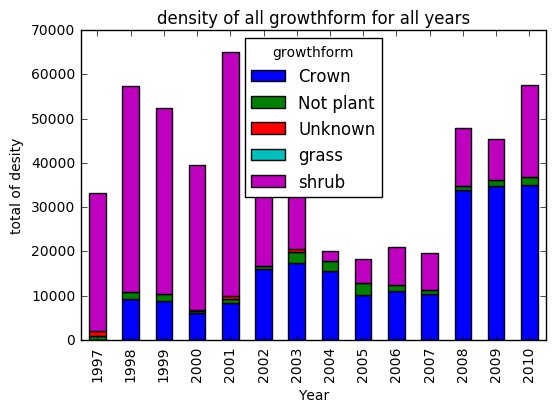

In [23]:
density_growthform_plot = density_growthform_year_wide.plot(kind ='bar', stacked = True, 
                  title = "density of all growthform for all years")
density_growthform_plot.set_xlabel("Year")
density_growthform_plot.set_ylabel("total of desity")

#### Figure 4
#### At least one additional plot investigating the relationship between plant composition (e.g. species or growth form) and another variable.
this plot shows that density of Crown increased with year, and desity of shrub decreased